In [8]:

# Use the MLPClassifier() function on your project dataset.

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

data = pd.read_csv('new_data1.csv')

X = data[['Temperature_1','Wind_Speed_1','weather_code_1','Distance_travelled_1']] #feature column
data['VSKP'] = data['VSKP'].apply(lambda x: 0 if x < 10 else 1)
y = data['VSKP'] #target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=1)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test_scaled)

# Print classification report and accuracy
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       0.00      0.00      0.00         1

    accuracy                           0.99        73
   macro avg       0.49      0.50      0.50        73
weighted avg       0.97      0.99      0.98        73

Accuracy: 0.9863013698630136


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from scipy.stats import randint

# Load your dataset
data = pd.read_csv('new_data1.csv')

# Define features and target variable
X = data[['Temperature_1', 'Wind_Speed_1', 'weather_code_1', 'Distance_travelled_1']]
data['VSKP'] = data['VSKP'].apply(lambda x: 0 if x < 10 else 1)
y = data['VSKP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'max_iter': randint(100, 500)
}

# Initialize MLPClassifier
mlp = MLPClassifier(random_state=1)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(mlp, param_distributions=param_grid, n_iter=10, cv=3, random_state=42, verbose=2, n_jobs=-1)

# Perform RandomizedSearchCV to find the best parameters
random_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters found: ", random_search.best_params_)
print("Best Score found: ", random_search.best_score_)

# Get the best model from RandomizedSearchCV
best_mlp = random_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_mlp.predict(X_test_scaled)

# Print classification report and accuracy
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'max_iter': 370, 'solver': 'adam'}
Best Score found:  0.9897257872221054
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       0.00      0.00      0.00         1

    accuracy                           0.99        73
   macro avg       0.49      0.50      0.50        73
weighted avg       0.97      0.99      0.98        73

Accuracy: 0.9863013698630136


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
print(random_search.best_params_)

{'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 357, 'solver': 'sgd'}


In [5]:
print(random_search.best_estimator_)

MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), max_iter=357,
              random_state=1, solver='sgd')


In [6]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
# Load your dataset (already loaded in A2)
data = pd.read_csv('new_data1.csv')

# Define features and target variable (already defined in A2)
X = data[['Temperature_1', 'Wind_Speed_1', 'weather_code_1', 'Distance_travelled_1']]
data['VSKP'] = data['VSKP'].apply(lambda x: 0 if x < 10 else 1)
y = data['VSKP']

# Split the data into training and testing sets (already done in A2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (already done in A2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'MLP': best_mlp,
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(silent=True),
    'Naive Bayes': GaussianNB()
}

# Dictionary to store results
results = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train, predict and evaluate each classifier
for name, clf in classifiers.items():
    # Fit the classifier
    clf.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results['Classifier'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Print the results
print(results_df)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_clas

      Classifier  Accuracy  Precision  Recall  F1 Score
0            MLP  0.986301        0.0     0.0       0.0
1            SVC  0.986301        0.0     0.0       0.0
2  Decision Tree  0.986301        0.0     0.0       0.0
3  Random Forest  0.986301        0.0     0.0       0.0
4       AdaBoost  0.986301        0.0     0.0       0.0
5        XGBoost  0.986301        0.0     0.0       0.0
6       CatBoost  0.986301        0.0     0.0       0.0
7    Naive Bayes  0.986301        0.0     0.0       0.0


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix for MLP:
[[72  0]
 [ 1  0]]


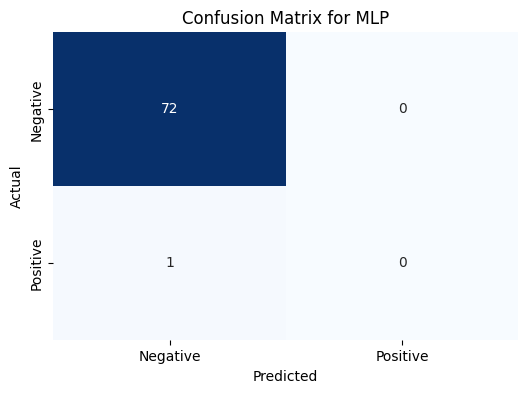

Confusion Matrix for SVC:
[[72  0]
 [ 1  0]]


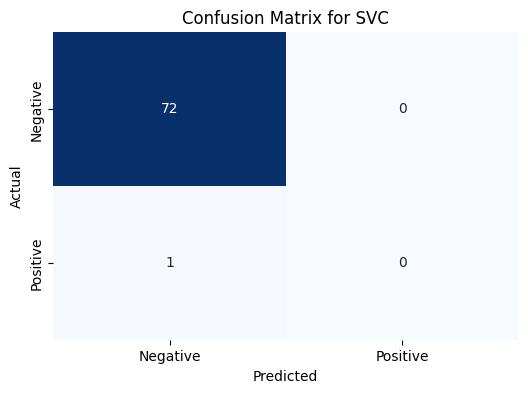

Confusion Matrix for Decision Tree:
[[72  0]
 [ 1  0]]


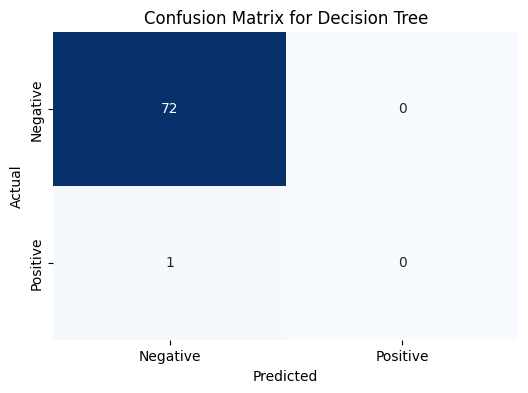

Confusion Matrix for Random Forest:
[[72  0]
 [ 1  0]]


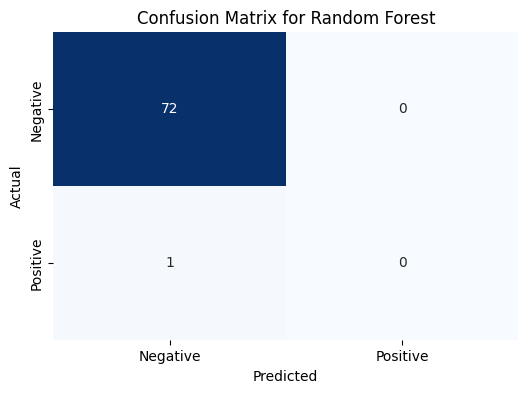

Confusion Matrix for AdaBoost:
[[72  0]
 [ 1  0]]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


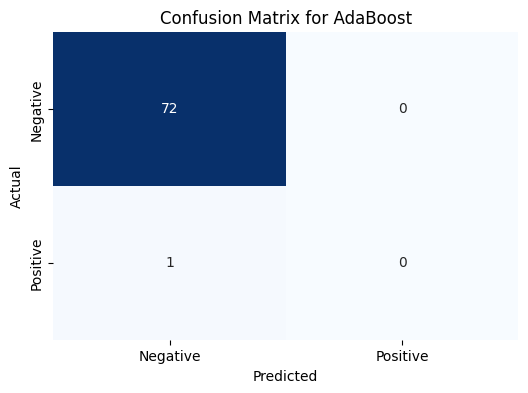

C:\Users\Shashank\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [23:54:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix for XGBoost:
[[72  0]
 [ 1  0]]


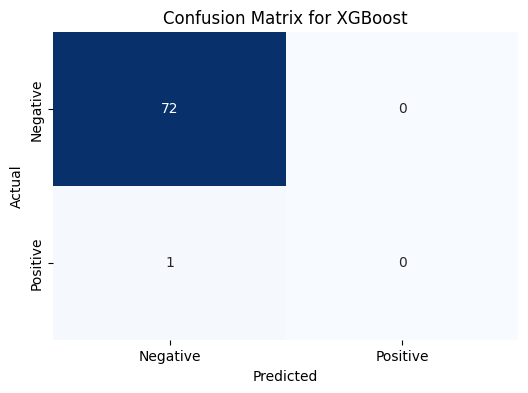

Confusion Matrix for CatBoost:
[[72  0]
 [ 1  0]]


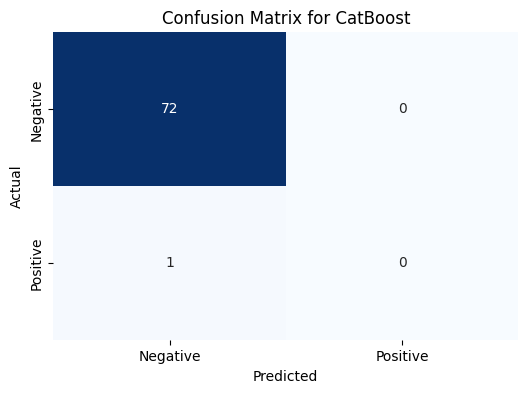

Confusion Matrix for Naive Bayes:
[[72  0]
 [ 1  0]]


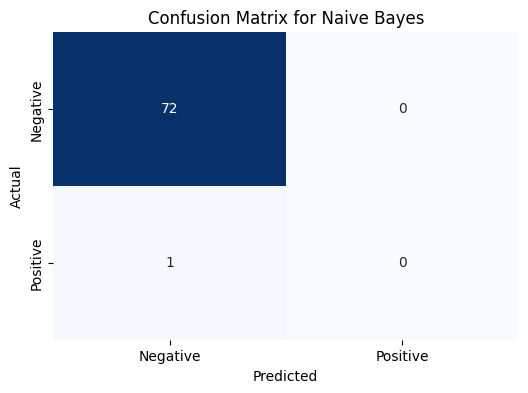

       Classifier  Accuracy  Precision  Recall  F1 Score
0             MLP  0.986301        0.0     0.0       0.0
1             SVC  0.986301        0.0     0.0       0.0
2   Decision Tree  0.986301        0.0     0.0       0.0
3   Random Forest  0.986301        0.0     0.0       0.0
4        AdaBoost  0.986301        0.0     0.0       0.0
5         XGBoost  0.986301        0.0     0.0       0.0
6        CatBoost  0.986301        0.0     0.0       0.0
7     Naive Bayes  0.986301        0.0     0.0       0.0
8             MLP  0.986301        0.0     0.0       0.0
9             SVC  0.986301        0.0     0.0       0.0
10  Decision Tree  0.986301        0.0     0.0       0.0
11  Random Forest  0.986301        0.0     0.0       0.0
12       AdaBoost  0.986301        0.0     0.0       0.0
13        XGBoost  0.986301        0.0     0.0       0.0
14       CatBoost  0.986301        0.0     0.0       0.0
15    Naive Bayes  0.986301        0.0     0.0       0.0


In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classifier_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.show()

# Iterate over classifiers to evaluate and plot confusion matrix
for name, clf in classifiers.items():
    # Fit the classifier
    clf.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print confusion matrix
    print(f'Confusion Matrix for {name}:')
    print(cm)
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, name)
    
    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)  # Handle division by zero
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # Store results
    results['Classifier'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Print the results
print(results_df)


In [23]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer for handling NaNs

data = pd.read_csv('new_data1.csv')
data.drop(columns=['date(dd/mm/yy)'], inplace=True)
# Define features and target variable
features = data.columns.difference(['HYB'])  # All columns except 'HYB'
X = data[features]
y = data['HYB']
y = y.apply(lambda x: 0 if x < 15 else 1)

# Check for NaN values in X and print row numbers
if X.isnull().values.any():
    nan_rows = X[X.isnull().any(axis=1)].index.tolist()  # Get row indices with NaNs
    print(f"Rows with NaN values in X: {nan_rows}")
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)  # Impute NaNs
else:
    print("No NaN values found in X.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(silent=True),
    'Naive Bayes': GaussianNB()
}

# Create a dictionary to store results
results = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train, predict and evaluate each classifier
for name, clf in classifiers.items():
    # Fit the classifier
    clf.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)  # Handle division by zero
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # Store results
    results['Classifier'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Print the results
print(results_df)


Rows with NaN values in X: [363, 364]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Shashank\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:08:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


      Classifier  Accuracy  Precision    Recall  F1 Score
0            SVC  0.890411   1.000000  0.333333  0.500000
1  Decision Tree  0.863014   0.562500  0.750000  0.642857
2  Random Forest  0.917808   0.800000  0.666667  0.727273
3       AdaBoost  0.835616   0.500000  0.500000  0.500000
4        XGBoost  0.904110   0.727273  0.666667  0.695652
5       CatBoost  0.917808   0.800000  0.666667  0.727273
6    Naive Bayes  0.835616   0.500000  0.750000  0.600000
